<p style = "font-family:optima"> Universidad del Valle de Guatemala   <br> 
Facultad de Ingeniería    <br>
Departamento de Ing. en CCTI & Bioinformática  <br>
Data Science    <br>
    María Isabel Montoya Valladares <b>19169</b> <br>
María José Morales Reichenbach <b>19145</b> <br>
Luis Pedro García Salazar <b>19344</b> 
</p>

<div align="center"><b>
<h1 style="font-family:optima"> Laboratorio #4 </h1>
    <h3 style="font-family:optima"><i> Predicción de Nuevas Palabras Usando Minería de Texto </i> </h3></b></div>

<p style="font-family:optima"> <b> Instrucciones </b> Utilice el data set Tweets Blogs News -Swiftkey Dataset 4million. NLP -Tweets, Blogs, and News Articles 4 million text entriesde Kaggle. Debe hacer un análisis exploratorio para entender mejor los datos,  sabiendo  que  el  objetivo  final  es predecir  la  próxima  palabra  que  el  usuario  ingresará.  El sistema debe proponer las próximas 3 palabras más probables, que el usuario escribirá, dada una frase que ingrese.Genere un informe en pdf con las explicaciones de los pasos que llevó a cabo y los  resultados  obtenidos. Recuerde  que  la  investigación  debe  ser  reproducible  por  lo  que  debe guardar el código que ha utilizado para resolver los ejerciciosy/o cada uno de los pasos llevados a cabo si utiliza una herramienta visual. Incluya una nube de palabras que le ayude a detectar las que más se repiten.Este laboratorio debe realizarse entríos (grupos de 3).
<p style="font-family:optima"> <b>Introducción </b> Se cuenta con tres datasets: <ol style="font-family:optima">
    <li><p style="font-family:optima"> en_US.tweet.txt: Este es un dataset de texto, cuyo origen son twwetds de personas que estan registradas en twitter en Estados Unidos, por ende, el texto se encuentra en ingles. El tamaño del txt es de 163,189 Kb </li>
    <li><p style="font-family:optima"> en_US.news.txt: Este es un dataset de texto, cuyo origen son noticias de Estados Unidos, por ende, el texto se encuentra en ingles también. El tamaño del txt es de 200,989 Kb </li>
    <li><p style="font-family:optima"> en_US.blogs.txt: Este es un dataset de texto, cuyo origen son blogs de personas de Estados Unidos, solamente son pequeños abstracts, por ende, el texto se encuentra en ingles también. El tamaño del txt es de 205,235 Kb </li>

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns #plotear grafica
import re #limpieza de datos
import matplotlib.pyplot as plt #plotear graficas
from wordcloud import WordCloud #rep de frecuencia de palabras
from nltk.corpus import stopwords #limpieza de datos
from nltk.util import ngrams #para ngramas
from nltk import word_tokenize #para el word counter
from collections import Counter, defaultdict #word counter y defaultdict para probabilidad de ocurrencia
import zipfile #unzip files
import random #hacer toma de muestra
from nltk.probability import ConditionalFreqDist
import nltk #calcular probabilidades
import unicodedata #limpieza de datos
import string


<p style="font-family:optima"> Se cargan los zip files descargados de kaggle, se descomprimen y se leen los .txt

In [2]:
file_name = 'en_US.twitter.txt.zip'
with zipfile.ZipFile(file_name, 'r') as file:
    file.extractall()
file_name = 'en_US.news.txt.zip'
with zipfile.ZipFile(file_name, 'r') as file:
    file.extractall()
file_name = 'en_US.blogs.txt.zip'
with zipfile.ZipFile(file_name, 'r') as file:
    file.extractall()

In [3]:
f = open('./en_US.twitter.txt', 'r')
twitter = f.readlines()
f.close()
f = open('./en_US.news.txt', 'r')
news = f.readlines()
f.close()
f = open('./en_US.blogs.txt', 'r')
blogs = f.readlines()
f.close()

<p style="font-family:optima"> Se imprime los datos para observar en que estado se encuentran.

In [4]:
print('Twitter')
print(twitter[0:5])
print('\nNews')
print(news[0:5])
print('\nBlogs')
print(blogs[0:5])

Twitter
['How are you? Btw thanks for the RT. You gonna be in DC anytime soon? Love to see you. Been way, way too long.\n', "When you meet someone special... you'll know. Your heart will beat more rapidly and you'll smile for no reason.\n", "they've decided its more fun if I don't.\n", 'So Tired D; Played Lazer Tag & Ran A LOT D; Ughh Going To Sleep Like In 5 Minutes ;)\n', 'Words from a complete stranger! Made my birthday even better :)\n']

News
["He wasn't home alone, apparently.\n", 'The St. Louis plant had to close. It would die of old age. Workers had been making cars there since the onset of mass automotive production in the 1920s.\n', "WSU's plans quickly became a hot topic on local online sites. Though most people applauded plans for the new biomedical center, many deplored the potential loss of the building.\n", 'The Alaimo Group of Mount Holly was up for a contract last fall to evaluate and suggest improvements to Trenton Water Works. But campaign finance records released th

<p style="font-family:optima"> A primera vista pidemos ver que cada .txt se guardo en una lista diferente, twitter, blogs y news respectivamente. Se observa que cada elemento en la lista es un solo elemento en su propia base de datos, i.e. tweets en el caso de twitter, y noticias en en el caso de news. Encontramos que al final de cada elemento de la lista nos encontramos con "\n" por lo que lo tendremos que eliminar, asimismo con que todas las letras se encuentren en minuscula, eliminar cualquier signo que no sea parte de las letras del alfabeto (songos de puntuacion, caracteres especiales, etc). Nos encontramos con textos con numeros, sin embargo, para la predicción de texto, y observando el contexto en el que se están utilizando, el comportamiento de los numeros es aleatorio y no nos ayuda a predecir por lo que puede ser sabio eliminarlos también en el proceso de limpieza. No se usara la lemitezacion por la perdida de conjugacion de verbos.
 <br>
<h3 style="font-family:optima"><b> Limpieza y preprocesamiento de datos </b></h3><br>
<h4 style="font-family:optima"><i> Cambio de mayúscula a minúscula </i>

In [5]:
twitter = [i.lower() for i in twitter]
news = [i.lower() for i in news]
blogs = [i.lower() for i in blogs]
print('Twitter')
print(twitter[0:5])
print('\nNews')
print(news[0:5])
print('\nBlogs')
print(blogs[0:5])

Twitter
['how are you? btw thanks for the rt. you gonna be in dc anytime soon? love to see you. been way, way too long.\n', "when you meet someone special... you'll know. your heart will beat more rapidly and you'll smile for no reason.\n", "they've decided its more fun if i don't.\n", 'so tired d; played lazer tag & ran a lot d; ughh going to sleep like in 5 minutes ;)\n', 'words from a complete stranger! made my birthday even better :)\n']

News
["he wasn't home alone, apparently.\n", 'the st. louis plant had to close. it would die of old age. workers had been making cars there since the onset of mass automotive production in the 1920s.\n', "wsu's plans quickly became a hot topic on local online sites. though most people applauded plans for the new biomedical center, many deplored the potential loss of the building.\n", 'the alaimo group of mount holly was up for a contract last fall to evaluate and suggest improvements to trenton water works. but campaign finance records released th

<h4 style="font-family:optima"><i> Eliminacion de URL </i></h4>

In [6]:
twitter=[re.sub(r'(?:(?:http|https):\/\/)?([-a-zA-Z0-9.]{2,256}\.[a-z]{2,4})\b(?:\/[-a-zA-Z0-9@:%_\+.~#?&//=]*)?',"",i) for i in twitter]
news=[re.sub(r'(?:(?:http|https):\/\/)?([-a-zA-Z0-9.]{2,256}\.[a-z]{2,4})\b(?:\/[-a-zA-Z0-9@:%_\+.~#?&//=]*)?',"",i) for i in news]
blogs=[re.sub(r'(?:(?:http|https):\/\/)?([-a-zA-Z0-9.]{2,256}\.[a-z]{2,4})\b(?:\/[-a-zA-Z0-9@:%_\+.~#?&//=]*)?',"",i) for i in blogs]

print('Twitter')
print(twitter[0:5])
print('\nNews')
print(news[0:5])
print('\nBlogs')
print(blogs[0:5])

Twitter
['how are you? btw thanks for the rt. you gonna be in dc anytime soon? love to see you. been way, way too long.\n', "when you meet someone special... you'll know. your heart will beat more rapidly and you'll smile for no reason.\n", "they've decided its more fun if i don't.\n", 'so tired d; played lazer tag & ran a lot d; ughh going to sleep like in 5 minutes ;)\n', 'words from a complete stranger! made my birthday even better :)\n']

News
["he wasn't home alone, apparently.\n", 'the st. louis plant had to close. it would die of old age. workers had been making cars there since the onset of mass automotive production in the 1920s.\n', "wsu's plans quickly became a hot topic on local online sites. though most people applauded plans for the new biomedical center, many deplored the potential loss of the building.\n", 'the alaimo group of mount holly was up for a contract last fall to evaluate and suggest improvements to trenton water works. but campaign finance records released th

<h4 style="font-family:optima"><i> Eliminacion de caracteres especiales y emojis </i></h4> <p style="font-family:optima"> Para esto, al saber que estamos tratando con tweets, noticias y entradas de blog del idioma ingles, vamos a forzar a que los caracteres sean codificantes en ASCII, de esta manera poder deshacernos de letras con tildes, alguna palabra en otro Unicode y de los emojis. 

In [9]:
twitter = [i.encode('ascii', 'ignore').decode('ascii') for i in twitter]
twitter=[re.sub('[^a-zA-Z0-9 ]+','', i) for i in twitter]
twitter =[i.strip('.,?!"\'') for i in twitter]
news = [i.encode('ascii', 'ignore').decode('ascii') for i in news]
news=[re.sub('[^a-zA-Z0-9 ]+','', i) for i in news]
news =[i.strip('.,?!"\'') for i in news]
blogs = [i.encode('ascii', 'ignore').decode('ascii') for i in blogs]
blogs=[re.sub('[^a-zA-Z0-9 ]+','', i) for i in blogs]
blogs =[i.strip('.,?!"\'') for i in blogs]

print('Twitter')
print(twitter[0:5])
print('\nNews')
print(news[0:5])
print('\nBlogs')
print(blogs[0:5])

Twitter
['how are you btw thanks for the rt you gonna be in dc anytime soon love to see you been way way too long', 'when you meet someone special youll know your heart will beat more rapidly and youll smile for no reason', 'theyve decided its more fun if i dont', 'so tired d played lazer tag  ran a lot d ughh going to sleep like in 5 minutes ', 'words from a complete stranger made my birthday even better ']

News
['he wasnt home alone apparently', 'the st louis plant had to close it would die of old age workers had been making cars there since the onset of mass automotive production in the 1920s', 'wsus plans quickly became a hot topic on local online sites though most people applauded plans for the new biomedical center many deplored the potential loss of the building', 'the alaimo group of mount holly was up for a contract last fall to evaluate and suggest improvements to trenton water works but campaign finance records released this week show the two employees donated a total of 45

<h4 style="font-family:optima"> <i>Eliminacion de stopwrods </i></h4>

In [10]:
stop_words = set(stopwords.words("english"))
twitter2=[] #lista para guardar sin stopwords
for tweet in twitter:
    palabras=[]
    for palabra in tweet.split():
        if palabra not in stop_words:
            palabras.append(palabra)
    twitter2.append(' '.join(palabras))
news2=[] #lista para guardar sin stopwords
for new in news:
    palabras=[]
    for palabra in new.split():
        if palabra not in stop_words:
            palabras.append(palabra)
    news2.append(' '.join(palabras))
blogs2=[] #lista para guardar sin stopwords
for blog in blogs:
    palabras=[]
    for palabra in blog.split():
        if palabra not in stop_words:
            palabras.append(palabra)
    blogs2.append(' '.join(palabras))
print('Twitter')
print(twitter2[0:5])
print('\nNews')
print(news2[0:5])
print('\nBlogs')
print(blogs2[0:5])

Twitter
['btw thanks rt gonna dc anytime soon love see way way long', 'meet someone special youll know heart beat rapidly youll smile reason', 'theyve decided fun dont', 'tired played lazer tag ran lot ughh going sleep like 5 minutes', 'words complete stranger made birthday even better']

News
['wasnt home alone apparently', 'st louis plant close would die old age workers making cars since onset mass automotive production 1920s', 'wsus plans quickly became hot topic local online sites though people applauded plans new biomedical center many deplored potential loss building', 'alaimo group mount holly contract last fall evaluate suggest improvements trenton water works campaign finance records released week show two employees donated total 4500 political action committee pac partners progress early june partners progress reported gave 10000 direct inkind contributions mayor tony mack two weeks leading victory mayoral runoff election june 15', 'often difficult predict laws impact legisla

<h3 style="font-family:optima"> Frecuencia de palabras en cada archivo </h3>

<p style="font-family:optima">Twitter

In [11]:
tc = Counter()
for i in twitter2:
    tc.update(word_tokenize(i))

tc

Counter({'btw': 2807,
         'thanks': 88619,
         'rt': 88653,
         'gon': 22559,
         'na': 36238,
         'dc': 4601,
         'anytime': 1644,
         'soon': 19304,
         'love': 105444,
         'see': 66477,
         'way': 36489,
         'long': 18871,
         'meet': 10164,
         'someone': 20378,
         'special': 7184,
         'youll': 6764,
         'know': 79207,
         'heart': 9181,
         'beat': 5582,
         'rapidly': 108,
         'smile': 4470,
         'reason': 5879,
         'theyve': 922,
         'decided': 2138,
         'fun': 22739,
         'dont': 90032,
         'tired': 6642,
         'played': 3954,
         'lazer': 24,
         'tag': 1440,
         'ran': 1887,
         'lot': 13426,
         'ughh': 325,
         'going': 55548,
         'sleep': 12940,
         'like': 121274,
         '5': 13458,
         'minutes': 6827,
         'words': 6912,
         'complete': 2451,
         'stranger': 714,
         'made': 

<p style="font-family:optima">News

In [12]:
nc = Counter()
for i in news2:
    nc.update(word_tokenize(i))

nc

Counter({'wasnt': 8771,
         'home': 29312,
         'alone': 2898,
         'apparently': 2090,
         'st': 21739,
         'louis': 10045,
         'plant': 4310,
         'close': 8629,
         'would': 71595,
         'die': 1285,
         'old': 10027,
         'age': 5841,
         'workers': 7522,
         'making': 11533,
         'cars': 4016,
         'since': 23934,
         'onset': 111,
         'mass': 1715,
         'automotive': 439,
         'production': 3865,
         '1920s': 260,
         'wsus': 15,
         'plans': 8256,
         'quickly': 4444,
         'became': 6414,
         'hot': 4262,
         'topic': 755,
         'local': 12847,
         'online': 5183,
         'sites': 2099,
         'though': 13214,
         'people': 47560,
         'applauded': 220,
         'new': 70301,
         'biomedical': 88,
         'center': 19873,
         'many': 30275,
         'deplored': 13,
         'potential': 5053,
         'loss': 6349,
         'buildi

<p style="font-family:optima">Blogs

In [13]:
bc = Counter()
for i in blogs2:
    bc.update(word_tokenize(i))

bc

Counter({'years': 34734,
         'thereafter': 218,
         'oil': 5410,
         'fields': 1118,
         'platforms': 258,
         'named': 3018,
         'pagan': 241,
         'gods': 4143,
         'love': 44725,
         'mr': 6959,
         'brown': 4555,
         'chad': 197,
         'awesome': 4683,
         'kids': 14508,
         'holding': 2842,
         'fort': 580,
         'work': 36914,
         'later': 12471,
         'usual': 2935,
         'busy': 4807,
         'together': 15816,
         'playing': 6357,
         'skylander': 1,
         'xbox': 170,
         'kyan': 25,
         'cashed': 30,
         'piggy': 127,
         'bank': 2475,
         'wanted': 15659,
         'game': 8932,
         'bad': 12477,
         'used': 23138,
         'gift': 4634,
         'card': 10286,
         'birthday': 5286,
         'saving': 1205,
         'money': 11857,
         'get': 70760,
         'never': 31097,
         'taps': 173,
         'thing': 23733,
         'ei

<h3 style="font-family:optima"> Análisis Exploratorio </h3>
<h4 style="font-family:optima"><i> Palabras más frecuentes de las bases de datos</i></h4>
<p style="font-family:optima"> Twitter


In [14]:
print ("",tc.most_common(5))

 [('im', 158473), ('like', 121274), ('get', 111795), ('love', 105444), ('good', 99604)]


<p style="font-family:optima"> News


In [15]:
print ("",nc.most_common(5))

 [('said', 250347), ('one', 83167), ('would', 71595), ('new', 70301), ('also', 58756)]


<p style="font-family:optima"> blogs


In [16]:
print ("",bc.most_common(5))

 [('one', 124316), ('like', 98247), ('time', 88109), ('would', 81663), ('get', 70760)]


<h4 style="font-family:optima"><i> Word count de más frecuentes de las bases de datos</i></h4>


<p style="font-family:optima">Twitter

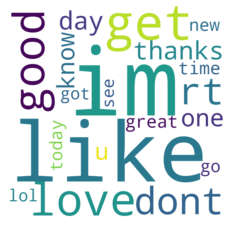

In [17]:
# create the WordCloud object
wordcloud = WordCloud(background_color="white",width=1000,height=1000, max_words=20,relative_scaling=0.5,normalize_plurals=False)

# generate the word cloud
wordcloud.generate_from_frequencies(tc)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<p style="font-family:optima"> News


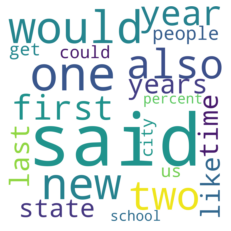

In [18]:
# create the WordCloud object
wordcloud = WordCloud(background_color="white",width=1000,height=1000, max_words=20,relative_scaling=0.5,normalize_plurals=False)

# generate the word cloud
wordcloud.generate_from_frequencies(nc)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<p style="font-family:optima"> blogs


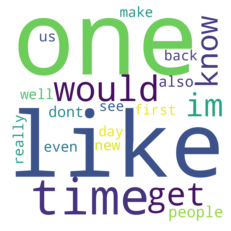

In [19]:
# create the WordCloud object
wordcloud = WordCloud(background_color="white",width=1000,height=1000, max_words=20,relative_scaling=0.5,normalize_plurals=False)

# generate the word cloud
wordcloud.generate_from_frequencies(bc)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<h4 style="font-family:optima"><i> Histograma de palabras más frecuentes de las bases de datos</i></h4>

<p style="font-family:optima">Twitter

<AxesSubplot:xlabel='frequency', ylabel='word'>

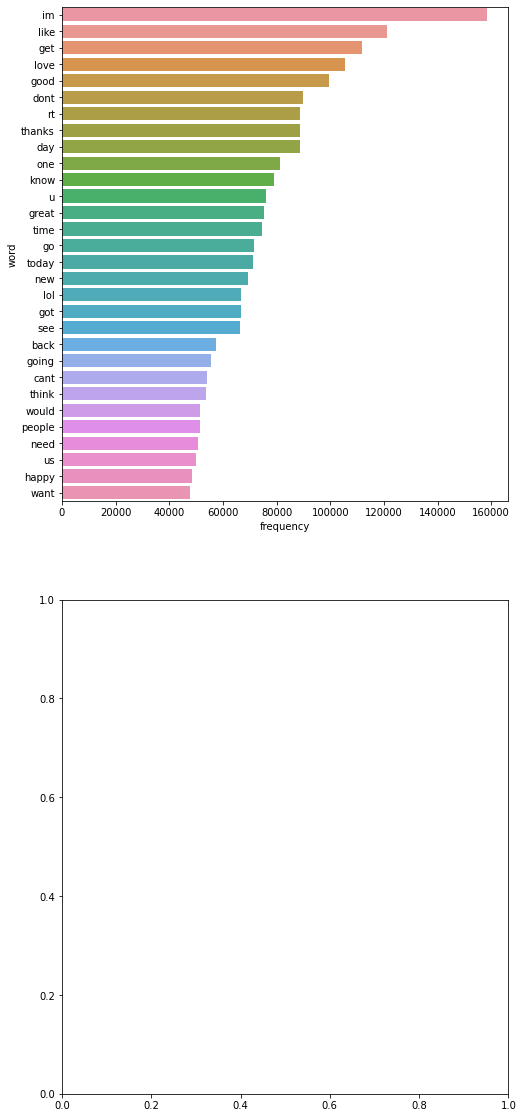

In [20]:
word_freqtc = pd.DataFrame.from_dict(tc, orient='index').reset_index()
word_freqtc = word_freqtc.rename(columns={'index':'word', 0:'frequency'})
word_freqtc = word_freqtc.sort_values(by='frequency',ascending=False)
fig, axes = plt.subplots(2,1,figsize=(8,20))
sns.barplot(ax=axes[0],x='frequency',y='word',data=word_freqtc.head(30))

<p style="font-family:optima"> News


<AxesSubplot:xlabel='frequency', ylabel='word'>

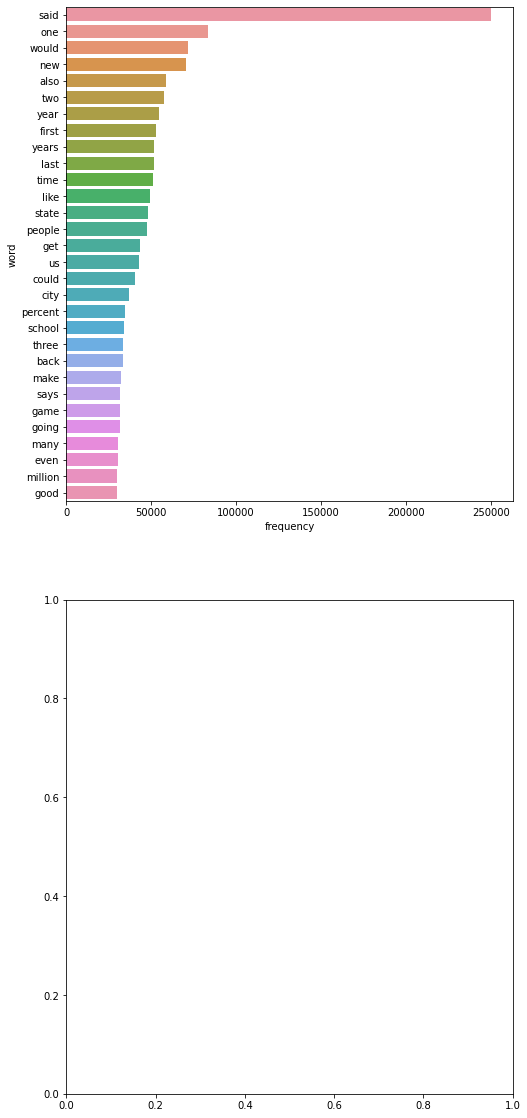

In [21]:
word_freqnc = pd.DataFrame.from_dict(nc, orient='index').reset_index()
word_freqnc = word_freqnc.rename(columns={'index':'word', 0:'frequency'})
word_freqnc = word_freqnc.sort_values(by='frequency',ascending=False)
fig, axes = plt.subplots(2,1,figsize=(8,20))
sns.barplot(ax=axes[0],x='frequency',y='word',data=word_freqnc.head(30))

<p style="font-family:optima"> blogs


<AxesSubplot:xlabel='frequency', ylabel='word'>

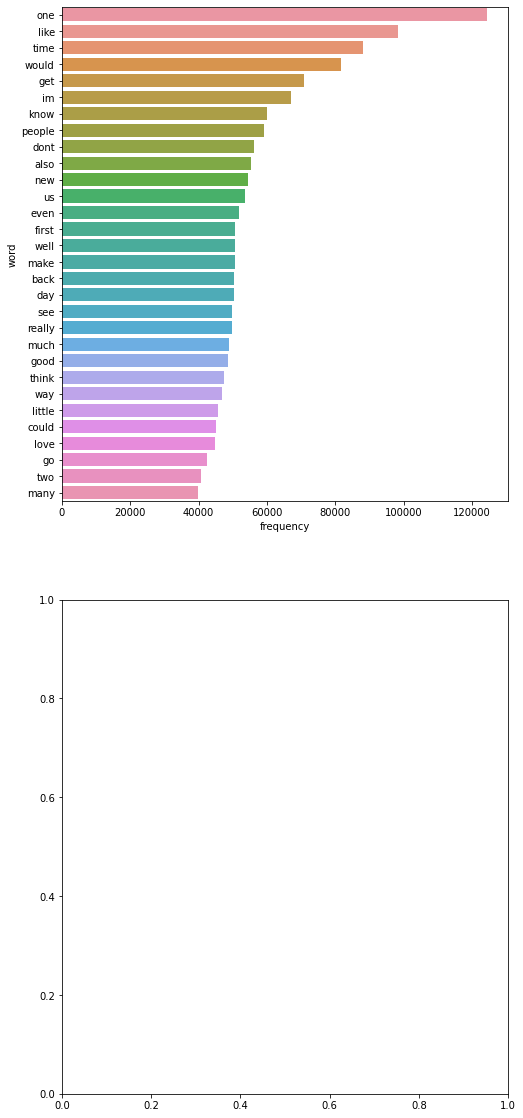

In [22]:
word_freqbc = pd.DataFrame.from_dict(bc, orient='index').reset_index()
word_freqbc = word_freqbc.rename(columns={'index':'word', 0:'frequency'})
word_freqbc = word_freqbc.sort_values(by='frequency',ascending=False)
fig, axes = plt.subplots(2,1,figsize=(8,20))
sns.barplot(ax=axes[0],x='frequency',y='word',data=word_freqbc.head(30))

<h4 style="font-family:optima"><i> Discusión Palabras más frecuentes </i></h4>
<p style="font-family:optima"> Las palabras mas repetidas en twitter vemos que son 'im', 'like' y 'get', en news son: 'said','one','would' y en blogs son:'one', 'like', 'time'. Esto no nos sorprende ya que, en el caso de twitter, se conoce que es una red social donde las personas se desahogan y pueden llegar a hablar mucho en primera persona, por eso el im, mientras que like también puede encontrarse ya que se comparten muchas opiniones personales. En news, ya que nos comparten cosas que ya pasaron, siempre se comparte el atestiguamiento de una persona, ya sea de lo que vio o de lo que piensa, por eso el said. En blogs podemos encontrar la palabra time ya que muchas veces nos podriamos en contrar con la frase de 'there was a time' o 'At this time' ya que muchas personas bloggeras usan esta plataforma para contar sus exxperiencias personales y aprendizajes. 


<h3 style="font-family:optima">Toma de muestra del 5% para n gramas </h3>

In [23]:
val=round(len(twitter2)*0.05,0)
muestraTC=random.sample(twitter2,int(val))
val=round(len(news2)*0.05,0)
muestraNC=random.sample(news2,int(val))
val=round(len(blogs2)*0.05,0)
muestraBC=random.sample(blogs2,int(val))

total=muestraTC + muestraNC +muestraBC
print(total[0:10])

['rise shine lots today first place begin gym', 'hate run somebody knows clue lol ummyeawatupdoe', 'created great blog everyone interested ancient greekhellenic culture check keep good work', 'al profit margin straight gangsta shit', 'sort writing', 'mostly pertains formatting issues compile unicode support cursor disappearance also cant copy paste tables', 'wow baseball season took downward spiral', 'hahahah would awesome like said guys go dont get hopes', 'good morning wonderful day dear friend p', 'like rt thinking starting rogue team d2l11 team competition rules points whos']


<h3 style="font-family:optima">Matrices de terminos para n gramas </h3>

<h4 style="font-family:optima"><i> Bigrama </i></h4>
<p style="font-family:optima"> Acá se realizó el bigrama usando ngrams de nktl, se muestra el numero de bigramas realizado y 30 primeros para no sobretrabajar la maquina.


In [24]:
bigrama=[]
n=2
for i in range(len(total)):
    for item in ngrams(total[i].split(),n):
        bigrama.append(item)
print('Hay '+str(len(bigrama))+' de bigramas en la muestra')
print(bigrama[0:30])

Hay 2635267 de bigramas en la muestra
[('rise', 'shine'), ('shine', 'lots'), ('lots', 'today'), ('today', 'first'), ('first', 'place'), ('place', 'begin'), ('begin', 'gym'), ('hate', 'run'), ('run', 'somebody'), ('somebody', 'knows'), ('knows', 'clue'), ('clue', 'lol'), ('lol', 'ummyeawatupdoe'), ('created', 'great'), ('great', 'blog'), ('blog', 'everyone'), ('everyone', 'interested'), ('interested', 'ancient'), ('ancient', 'greekhellenic'), ('greekhellenic', 'culture'), ('culture', 'check'), ('check', 'keep'), ('keep', 'good'), ('good', 'work'), ('al', 'profit'), ('profit', 'margin'), ('margin', 'straight'), ('straight', 'gangsta'), ('gangsta', 'shit'), ('sort', 'writing')]


<h4 style="font-family:optima"><i> Trigrama </i></h4>
<p style="font-family:optima"> Acá se realizó el trigrama usando ngrams de nktl, se muestra el numero de bigramas realizado y 30 primeros para no sobretrabajar la maquina.


In [25]:
trigrama=[]
n=3
for i in range(len(total)):
    for item in ngrams(total[i].split(),n):
        trigrama.append(item)
print('Hay '+str(len(trigrama))+' de trigramas en la muestra')
print(trigrama[0:30])

Hay 2427091 de trigramas en la muestra
[('rise', 'shine', 'lots'), ('shine', 'lots', 'today'), ('lots', 'today', 'first'), ('today', 'first', 'place'), ('first', 'place', 'begin'), ('place', 'begin', 'gym'), ('hate', 'run', 'somebody'), ('run', 'somebody', 'knows'), ('somebody', 'knows', 'clue'), ('knows', 'clue', 'lol'), ('clue', 'lol', 'ummyeawatupdoe'), ('created', 'great', 'blog'), ('great', 'blog', 'everyone'), ('blog', 'everyone', 'interested'), ('everyone', 'interested', 'ancient'), ('interested', 'ancient', 'greekhellenic'), ('ancient', 'greekhellenic', 'culture'), ('greekhellenic', 'culture', 'check'), ('culture', 'check', 'keep'), ('check', 'keep', 'good'), ('keep', 'good', 'work'), ('al', 'profit', 'margin'), ('profit', 'margin', 'straight'), ('margin', 'straight', 'gangsta'), ('straight', 'gangsta', 'shit'), ('mostly', 'pertains', 'formatting'), ('pertains', 'formatting', 'issues'), ('formatting', 'issues', 'compile'), ('issues', 'compile', 'unicode'), ('compile', 'unicode'

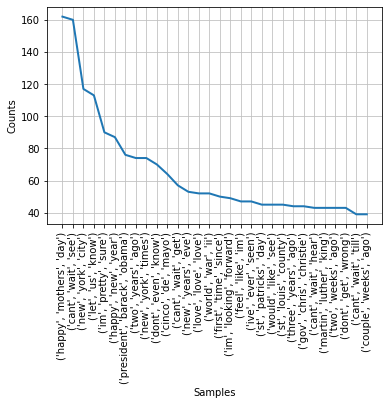

Most common trigrams:  [(('happy', 'mothers', 'day'), 162), (('cant', 'wait', 'see'), 160), (('new', 'york', 'city'), 117), (('let', 'us', 'know'), 113), (('im', 'pretty', 'sure'), 90)]


In [30]:
# get frequency distribution of trigrams in corpus
freq_tri = nltk.FreqDist(trigrama)
freq_tri.plot(30, cumulative=False)
print("Most common trigrams: ", freq_tri.most_common(5))

<h3 style="font-family:optima">Kneser-Ney smoothing probability (KNP) para calcular la probabilidad de ocurrencias de los ngramas para la prediccion de tres palabras</h3>

In [34]:
# make conditional frequencies dictionary
cfdist = ConditionalFreqDist()
for w1, w2, w3 in trigrama:
    cfdist[(w1, w2)][w3] += 1

# transform frequencies to probabilities
for w1_w2 in cfdist:
    total_count = float(sum(cfdist[w1_w2].values()))
    for w3 in cfdist[w1_w2]:
         cfdist[w1_w2][w3] /= total_count
dictt=dict(cfdist)
dictt

{('rise',
  'shine'): FreqDist({'lots': 0.14285714285714285, 'share': 0.14285714285714285, 'people': 0.14285714285714285, 'mix': 0.14285714285714285, 'everyone': 0.14285714285714285, 'back': 0.14285714285714285, 'ready': 0.14285714285714285}),
 ('shine', 'lots'): FreqDist({'today': 1.0}),
 ('lots',
  'today'): FreqDist({'first': 0.3333333333333333, 'surgical': 0.3333333333333333, 'need': 0.3333333333333333}),
 ('today',
  'first'): FreqDist({'day': 0.35, 'time': 0.1, 'place': 0.05, 'bicyclecommute': 0.05, 'kinda': 0.05, 'step': 0.05, 'radio': 0.05, 'stop': 0.05, 'major': 0.05, 'name': 0.05, ...}),
 ('first',
  'place'): FreqDist({'day': 0.02197802197802198, 'full': 0.02197802197802198, 'said': 0.02197802197802198, 'league': 0.02197802197802198, 'make': 0.02197802197802198, 'im': 0.02197802197802198, 'however': 0.02197802197802198, 'one': 0.02197802197802198, 'begin': 0.01098901098901099, 'remainder': 0.01098901098901099, ...}),
 ('place', 'begin'): FreqDist({'gym': 0.5, 'hope': 0.5}),


<p style="font-family:optima"> Lo que podemos ver acá es un diccionario que guarda como keys dos palabras de la muestra tomada y recorre toda la muestra del trigrama buscando las posibles terceras palabras para esas dos y se las asigna como value en conjunto de sus probabilidad de que esa sea su tercera palabra. 

<h3 style="font-family:optima">Predictor de palabras</h3>

In [58]:
user_input=input('Ingresar frase para predecir palabras:')

user_input = user_input.split()

w1 = len(user_input) - 2
w2 = len(user_input)
prev_words = user_input[w1:w2]
print(prev_words)

# display prediction from highest to lowest maximum likelihood
prediction = sorted(dict(cfdist[prev_words[0], prev_words[1]]), key=lambda x: dict(cfdist[prev_words[0], prev_words[1]])[x], reverse=True)
top3 = prediction[0:3]    
print("Predicciones del modelo: ", dict(cfdist[prev_words[0], prev_words[1]]))
print()
print('top 3 palabras: '+ str(top3))

Ingresar frase para predecir palabras:hello im
['hello', 'im']
Predicciones del modelo:  {'research': 0.125, 'sure': 0.125, 'stoked': 0.125, 'fan': 0.125, 'assuming': 0.125, 'whoorli': 0.125, 'breaking': 0.125, 'engineer': 0.125}
top 3 palabras: ['research', 'sure', 'stoked']
